# **EE25737: Introduction to Machine Learning**
### **Computer Homework 2**

*Radmehr Karimian*

*Student ID: 98103556*

## Problem C3: Linear Classification

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A. Load Data
Using the read_csv() function from pandas library, we extract data from data_banknote_authentication.csv (which has the DataFrame data type) and then transform it to numpy array:

In [346]:
from google.colab import drive
drive.mount('/media/gdrive', force_remount=True)

df = pd.read_csv(r'/media/gdrive/MyDrive/ML/CHW2/data_banknote_authentication.csv')
raw_data = np.array(object=df)


Mounted at /media/gdrive


In [350]:
# spliting labels and features
n = raw_data.shape[0]
X = raw_data[:, 0:4]
Y = raw_data[:, 4].reshape(n,1)

# spliting the sets
X_train = X[0:np.int(n*0.8),:]
Y_train = Y[0:np.int(n*0.8),0].reshape(np.int(n*0.8),1)

X_test = X[np.int(n*0.8):,:]
Y_test = Y[np.int(n*0.8):,0].reshape(n-np.int(n*0.8),1)


### B. Perceptron Algorithm
The following function is used to determine the loss. Note that the default value for the labels in calculations are 1 and -1 (d = abs(1 - (-1)) = 2).

In [352]:
def loss(Y_predicted, Y, d=2):
  return sum(((Y_predicted.ravel()-Y.ravel())/d)**2)/((Y.shape)[0])

First, we add one dimention with constant 1 to each data point in order to make the training set homogenous and solve a linear classification problem (instead of an affine problem):


In [425]:
X_tr = np.concatenate((np.ones(shape=((X_train.shape)[0],1)), X_train), axis=1)
X_te = np.concatenate((np.ones(shape=((X_test.shape)[0],1)), X_test), axis=1)

To classify the set using Perceptron algorithm, we follow these steps:

1. Initialize the weights. Weights may be initialized to 0 or to a small random value.

2. For each data point, we predict the label using the calculated weights and compare it with the actual label. The algorithm converges if the predicted label vactor and the actual label are identical, otherwise we recalculate the weight vector for the next iteration:

w(t+1) = w(t) + x_i*y_i

where (x_i,y_i) is the mispredicted datapoint.

The Perceptron algorithm is a linear classifier, therefore it will never get to the state with all the input vectors classified correctly if the training set is not linearly separable.

In [424]:
def perceptron(X_tr, Y_tr, X_te, Y_te, max_iter=50000):
  w = np.zeros(shape=((X_tr.shape)[1],1))
  loss_history_train = list()
  loss_history_test = list()
  final_i = max_iter;
  counter = 0;

  for i in range(1,max_iter+1,1):
    Y_predicted = np.sign(np.matmul(X_tr, w))
    index_wrong = (np.where( (Y_predicted-Y_tr) != 0))[0] # row of wrong predictions
    if (index_wrong.shape[0] != 0): # checking if there is any wrong predictions
      index = index_wrong[0]
      w = w + Y_tr[index,0]*(X_tr[index,:].reshape(((X_tr.shape)[1],1)))
    else:
      final_i = min(i, final_i);
    if (i%500 == 0):
      Y_predicted = np.sign(np.matmul(X_tr, w))
      l_train = loss(Y_predicted,Y_tr);
      loss_history_train.append(l_train)
      Y_predicted_test = np.sign(np.matmul(X_te, w))
      l_test = loss(Y_predicted_test,Y_te)
      loss_history_test.append(l_test)
      #if (index_wrong.shape[0] == 0):
        #counter = counter +1;
    #if counter == 5 :
      #break

  print('The algorithm stops at', final_i, 'th iteration.')
  print('The final error on the train set is', l_train)
  print('The final error on the test set is', l_test)
  print('The final weight vector is:', np.transpose(w))
  return w, loss_history_train, loss_history_test

In [426]:
# running the algorithm
w, loss_history_train, loss_history_test = perceptron(X_tr=X_tr, Y_tr=Y_train, X_te=X_te, Y_te=Y_test)

The algorithm stops at 39868 th iteration.
The final error on the train set is 0.0
The final error on the test set is 0.01818181818181818
The final weight vector is: [[ 475.         201.50565   -109.4033456   39.19858   1339.065463 ]]


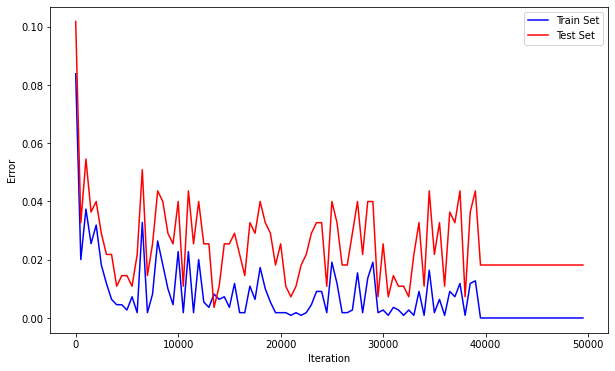

In [427]:
# plotting the results
plt.figure(figsize=(10, 6))
N = [t for t in range(1, 500*len(loss_history_train), 500)]
plt.plot(N, loss_history_train, c='b', label='Train Set')
plt.plot(N, loss_history_test, c='r', label='Test Set')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

### C. Generalize to Non-linear Classification

In [428]:
# mapping the data
X_tr = np.concatenate((np.ones(shape=((X_train.shape)[0],1)), X_train, (X_train[:,3]**3).reshape((X_train.shape)[0],1) ), axis=1)
X_te = np.concatenate((np.ones(shape=((X_test.shape)[0],1)), X_test, (X_test[:,3]**3).reshape((X_test.shape)[0],1)), axis=1)

In [431]:
# running the algorithm
w, loss_history_train, loss_history_test = perceptron(X_tr=X_tr, Y_tr=Y_train, X_te=X_te, Y_te=Y_test)

The algorithm stops at 3597 th iteration.
The final error on the train set is 0.0
The final error on the test set is 0.0036363636363636364
The final weight vector is: [[124.          70.00977    -40.2268496   10.69197    318.63396
   64.32316951]]


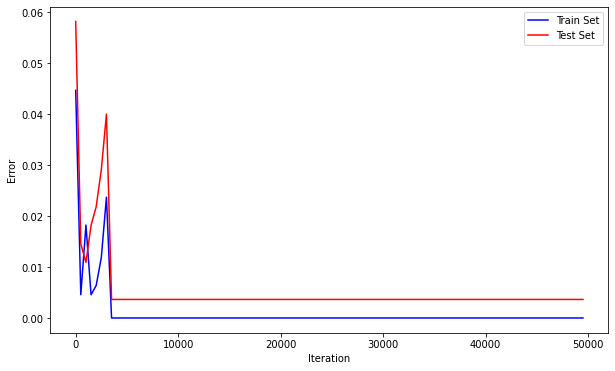

In [430]:
# plotting the results
plt.figure(figsize=(10, 6))
N = [t for t in range(1, 500*len(loss_history_train), 500)]
plt.plot(N, loss_history_train, c='b', label='Train Set')
plt.plot(N, loss_history_test, c='r', label='Test Set')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

### D. SVM Algorithm 

In [438]:
from sklearn import svm

In [439]:
# linear kernel
model = svm.SVC(kernel='linear') 

# training the model using the training sets
model.fit(X_train, Y_train.ravel())

# [model.intercept_, model.coef_]

l_train = loss(model.predict(X_train),Y_train)
l_test = loss(model.predict(X_test),Y_test)
print('The final error on the train set is', l_train)
print('The final error on the test set is', l_test)
print('The final weights are:\n', model.intercept_, '(for constant value)\n',
      model.coef_, '(coefs for features)')


The final error on the train set is 0.003825184664087232
The final error on the test set is 0.06396063960639606
The final weights are:
 [7.00032876] (for constant value)
 [[ 3.38820683e-05  6.77103699e-05 -4.87257570e-05  1.99989839e+00
  -2.25862703e-04 -1.95399252e-14 -6.00169717e+00  6.00195748e+00
  -1.51251030e-05 -3.99870565e+00 -4.00020194e+00 -2.00197752e+00
  -9.99314330e-01  1.45866777e-05  1.79823632e-05  0.00000000e+00
  -3.90798505e-14 -1.99733633e+00  1.50039014e+00 -3.56518383e-04
  -2.80533327e-04 -1.04525686e-05]] (coefs for features)


### E. Conclusion
The training set is linearly separable, so the error on the train set equals to zero (the algorithm coverges).

The error on the test set is the least for the generalized classification and the SVM output model is better than the first model (linear classification using perceptron algorithm), because it searches for an optimal model (not only the model which has the correct output) and in result, the error for the training set is less for the first model but the error for the test set is less for the SVM model.




## Problem C4: Decision Trees

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A. Load Data
Using the read_csv() function from pandas library, we extract data from mushrooms.csv (which has the DataFrame data type) and then transform it to numpy array:

In [434]:
from google.colab import drive
drive.mount('/media/gdrive', force_remount=True)

df = pd.read_csv(r'/media/gdrive/MyDrive/ML/CHW2/mushrooms.csv')
raw_data2 = np.array(object=df)

Mounted at /media/gdrive


In [440]:
# spliting labels and features
n = raw_data2.shape[0]
X = raw_data2[:, 1:]
Y = raw_data2[:, 0].reshape(n,1)

# spliting the sets
X_train = X[0:np.int(n*0.7),:]
Y_train = Y[0:np.int(n*0.7),0].reshape(X_train.shape[0],1)

X_val = X[np.int(n*0.7):np.int(n*0.9),:]
Y_val = Y[np.int(n*0.7):np.int(n*0.9),0].reshape(X_val.shape[0],1)

X_test = X[np.int(n*0.9):,:]
Y_test = Y[np.int(n*0.9):,0].reshape(X_test.shape[0],1)


### B. Train Desicion Tree
As you can see in the figure, the maximum depth doesn't effect the loss after a certain number (max_depth = 6). The more the maximum depth is, the more complex model is achievable, but a certain level of complexity is enough for us to reach the optimum model, so the possibility for a more complex model doesn't effect the loss.

*The random_state is a fixed value for all of the models in order to compare the effect of max_depth correctly.*

In [441]:
from sklearn.tree import DecisionTreeClassifier

In [465]:
depth_tree = [t for t in range(4, 21, 2)]
loss_train, loss_val, loss_test = list(), list(), list();
for d in depth_tree:
  model = DecisionTreeClassifier(max_depth=d, random_state=7)
  model = model.fit(X_train,Y_train)
  y_predicted = model.predict(X_test)
  loss_train.append(loss(model.predict(X_train), Y_train, 1))
  loss_val.append(loss(model.predict(X_val), Y_val, 1))
  loss_test.append(loss(model.predict(X_test), Y_test, 1))


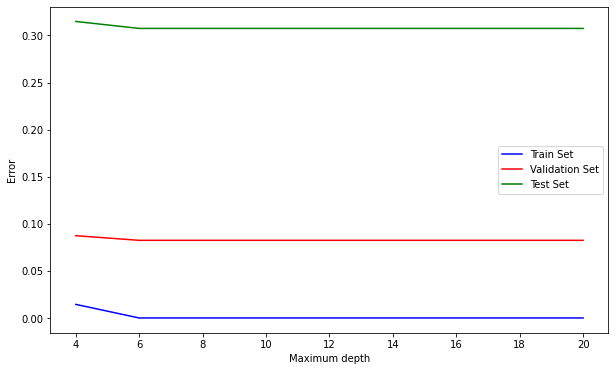

In [464]:
plt.figure(figsize=(10, 6))
plt.plot(depth_tree, loss_train, c='b', label='Train Set')
plt.plot(depth_tree, loss_val, c='r', label='Validation Set')
plt.plot(depth_tree, loss_test, c='g', label='Test Set')
plt.xlabel("Maximum depth")
plt.ylabel("Error")
plt.legend()
plt.show()